# Upload Data from Kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nourhanabosaeed","key":"4d49ff8d11be18e27baa4f5a95518c01"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp /content/kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d septa97/100k-courseras-course-reviews-dataset

 82% 10.0M/12.2M [00:01<00:00, 11.6MB/s]
100% 12.2M/12.2M [00:01<00:00, 7.60MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/100k-courseras-course-reviews-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
ls

100k-courseras-course-reviews-dataset.zip  reviews_by_course.csv  sample_data/
kaggle.json                                reviews.csv


# Check the data

In [10]:
import pandas as pd

reviews_course = pd.read_csv("reviews_by_course.csv")
reviews = pd.read_csv("reviews.csv")
print(reviews_course.shape)
print(reviews.shape)

(140320, 3)
(107018, 3)


In [11]:
reviews_course.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [12]:
reviews.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [13]:
len(reviews['Id'].unique())

107018

In [14]:
len(reviews_course['CourseId'].unique())

1835

In [15]:
reviews_course["CourseId"].unique()[:20]

array(['2-speed-it', '20cnwm', '2d-cad', '3d-cad', '3d-printing',
       '3d-printing-applications', '3d-printing-revolution',
       '3d-printing-software', 'a-programar', 'abdomen-anatomy',
       'ableton-live', 'aboriginal-education',
       'academic-discussion-english', 'academic-literacy',
       'academic-writing-capstone', 'academicinfoseek',
       'accounting-analytics', 'accounting-finance',
       'accounting-for-managers', 'activism-social-movements'],
      dtype=object)

# I will focus and make use of the first dataset "reviews_by_crouse"

# Data Cleaning

In [16]:
reviews_course=reviews_course.rename(columns={"Label": "rate", "Review": "review"})   # for simplicity
reviews_course.head()

,CourseId,review,rate
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [17]:
reviews_course["review"].tail(20)

140300                                               感谢蔡老师！
140301    聽完蔡老師莊子的課程很有意思，可以說是獲益良多，對於人生不同課題的態度均有所改善，謝謝老師在...
140302                               值得参与，修养身心，让自己更加从容面对生活。
140303    我非常開心能選到這門課.對我身心安頓非常有幫助.感恩!蔡老師解析得非常好.很容易理解.想不到...
140304                                                   完美
140305    提前看完第一周的课程。一个字，美。无论是音乐，还是插图，都极富韵味。让人在学习的同事也充满着...
140306    For those interested in taking exams, these qu...
140307    Buenos materiales, realización y orientación m...
140308    This course is awesome. It introduce the Zika ...
140309                                      Excelente curso
140310                               Muito bom e confiável.
140311                                           Fantastic!
140312    Muito bom o curso, feito perfeitamente com pro...
140313    Great, clear, concise, explanations on everyth...
140314    Excelente curso, se aprenden muchas perspectiv...
140315    Trendy topic with talks from expertises in the...
140316    Wonderful! Simple and clear la

In [18]:
# clean the reviews from the unuseful characters
import re

def clean_non_english_chars(text):
    # Check if the input is a valid string
    if isinstance(text, str):
        cleaned_text = re.sub(r'[^a-zA-Z\s\']', '', text)
        return cleaned_text
    else:
        return ''

reviews_course["review"] = reviews_course["review"].apply(lambda x: clean_non_english_chars(x))


In [19]:
reviews_course["review"].tail(20)

140300                                                     
140301                                                     
140302                                                     
140303                                                     
140304                                                     
140305                                                     
140306    For those interested in taking exams these que...
140307    Buenos materiales realizacin y orientacin mult...
140308    This course is awesome It introduce the Zika v...
140309                                      Excelente curso
140310                                 Muito bom e confivel
140311                                            Fantastic
140312    Muito bom o curso feito perfeitamente com prof...
140313    Great clear concise explanations on everything...
140314    Excelente curso se aprenden muchas perspectiva...
140315    Trendy topic with talks from expertises in the...
140316    Wonderful Simple and clear lan

In [20]:
reviews_course["review"][140306]

'For those interested in taking exams these questions were poorly worded and it was evident that the person writing the questions in English was not proficient in the English Language The material was interesting and up to date but much was lost in translation'

In [21]:
print(f"shape before {reviews_course.shape}")
reviews_course = reviews_course[reviews_course["review"] != '']
print(f"shape after {reviews_course.shape}")

shape before (140320, 3)
shape after (137867, 3)


In [22]:
def convert_to_lowercase(reviews):
    reviews = reviews.apply(lambda x: x.lower())
    return reviews

reviews_course["review"] = convert_to_lowercase(reviews_course["review"])

print(reviews_course["review"].head())

0                                               boring
1                                               bravo 
2                                             very goo
3    great course  i recommend it for all especiall...
4       one of the most useful course on it management
Name: review, dtype: object


In [23]:
! pip install langid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=b65c0a85adbf17556e10ecf62e39bbf37fea5a45622794d74779c2d52a698040
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [24]:
import langid

def filter_english_reviews(data):
    non_english = []
    for review in data:
        lang, _ = langid.classify(review)
        if lang != 'en':
            non_english.append(review)
    return non_english

non_english_reviews = filter_english_reviews(reviews_course["review"])
non_english_reviews

["etant contrleur de gestion pour le dpartement it hq  locale le cours est vraiment intressant et de trs bonne qualitj'insiste que la qualit et le professionnalisme des professeursi'm a controller for an it department the courses is very good and very helpful for my job i recommand you to follow the training",
 'excellent ',
 'excellent course',
 'autocad dcadautocad r',
 'cad',
 'good quality',
 'important information on copy rights patents etc',
 'well detailed',
 'ficou meio parecido com o primeiro curso da especializao mas mesmo assim vale a pena',
 'excellent',
 'great experience',
 'el curso es muy bueno practico y fcil de seguir',
 "pour avoir parcouru les deux premiers chapitres je trouve que le contenu est riche plutt didactique les interlocuteurs choisis sont des personnes pertinentes reconnues dans leur domaine j'ai hte de dcouvrir la suite ",
 'excellent',
 'amazing',
 'muy buen curso para iniciarse en el tema de la programacin',
 'es muy bueno para empezar aprender la prog

In [25]:
len(non_english_reviews)

21253

In [26]:
print(f"shape before {reviews_course.shape}")
reviews_course = reviews_course[~reviews_course["review"].isin(non_english_reviews)]
print(f"shape after {reviews_course.shape}")

shape before (137867, 3)
shape after (116614, 3)


In [27]:
max_length_review = reviews_course["review"].apply(len).max()

print(max_length_review)

7572


In [28]:
# Create label column that will relpace the Rates to positive, nagative and neutral
def create_label(x):
  if x==5:
    return "positive"
  elif x==4:
    return "negative"
  else:
    return "neutral"

reviews_course["label"] = reviews_course["rate"].apply(lambda x:create_label(x))
reviews_course['label'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [29]:
reviews_course.head()

,CourseId,review,rate,label
0,2-speed-it,boring,1,neutral
1,2-speed-it,bravo,5,positive
2,2-speed-it,very goo,5,positive
3,2-speed-it,great course i recommend it for all especiall...,5,positive
4,2-speed-it,one of the most useful course on it management,5,positive


# Balancing of the data

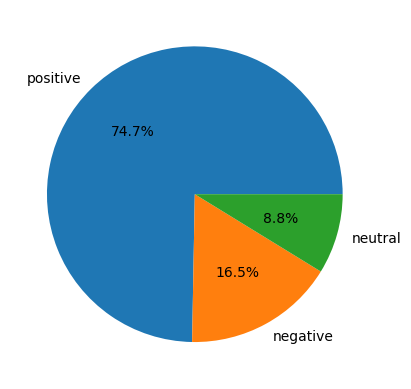

In [30]:
import matplotlib.pyplot as plt

plt.pie(
    reviews_course["label"].value_counts(),
    labels = reviews_course["label"].value_counts().index,
    autopct='%1.1f%%'
);

## **Imbalanced** **Data**

In [31]:
#encode the labels
reviews_course['label'] = reviews_course['label'].map({
        "negative" : 0,
        "neutral" : 1,
        "positive" : 2
    })
reviews_course.head()

,CourseId,review,rate,label
0,2-speed-it,boring,1,1
1,2-speed-it,bravo,5,2
2,2-speed-it,very goo,5,2
3,2-speed-it,great course i recommend it for all especiall...,5,2
4,2-speed-it,one of the most useful course on it management,5,2


# Transformers for Sentiment Analysis

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [33]:
from huggingface_hub import notebook_login

notebook_login()

## Tokenization

In [34]:
import transformers
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

checkpoint='distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [35]:
# Example
sample_text = reviews_course['review'][10]
tokens = tokenizer.tokenize(sample_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'Input Text: {sample_text}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Input Text: excellent course and teachers congratulations
Tokens: ['excellent', 'course', 'and', 'teachers', 'congratulations']
Token IDs: [6581, 2607, 1998, 5089, 23156]


The Special tokens:-

[SEP] - Marker for ending of a sentence - BERT uses 102

[CLS] - We must add this token at start of each sentence, so BERT knows we’re doing classification - BERT uses 101

[PAD] - Special token for padding - BERT uses number 0 for this.

[UNK] - BERT understands tokens that were in the training set. Everything else can be encoded using this unknown token

In [36]:
encoding = tokenizer.encode_plus(
  sample_text,
  max_length=5,
  truncation = True,  # Truncate to a maximum length
  add_special_tokens=True,
  return_token_type_ids=False,  # we deal with only one sentence
  padding='max_length',
  return_attention_mask=True,  # Which tokens should be attended to, and which should not.
  return_tensors='tf',  # Return tensorflow tensors
)

print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

5


<tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 101, 6581, 2607, 1998,  102], dtype=int32)>

In [37]:
print(len(encoding['attention_mask'][0]))    # 0 for not attended to (pading)
encoding['attention_mask']

5


<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[1, 1, 1, 1, 1]], dtype=int32)>

# Prepare for training

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_course["review"], reviews_course["label"], test_size=0.2, random_state=42, stratify = reviews_course["label"])
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify = y_test)

In [39]:
X_train.shape , X_test.shape, X_val.shape

((93291,), (11662,), (11661,))

In [40]:
X_train[0], y_train[0]

('boring', 1)

Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors


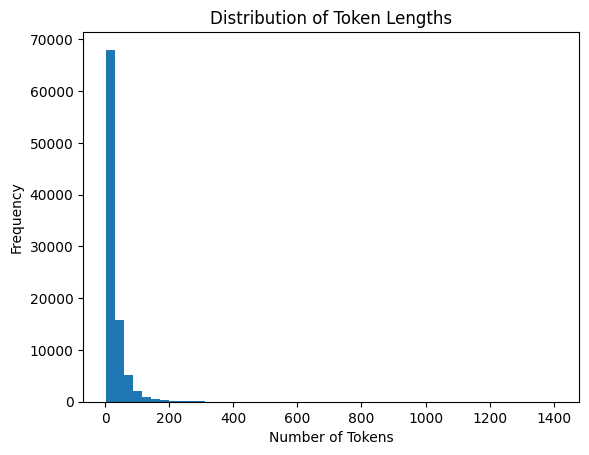

Maximum number of tokens: 1409


In [41]:
# Identify the maximum number of tokens

token_lengths = [len(tokenizer.encode(text)) for text in X_train]

max_tokens = max(token_lengths)

# Visualize the distribution
plt.hist(token_lengths, bins=50 )
plt.title('Distribution of Token Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

print(f"Maximum number of tokens: {max_tokens}")


In [42]:
from datasets import Dataset

df_train = pd.DataFrame({"text": X_train, "label": y_train})
df_val = pd.DataFrame({"text": X_val, "label": y_val})
df_test = pd.DataFrame({"text": X_test, "label": y_test})

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

93291
11661
11662


In [43]:
train_dataset[0]

{'text': 'this is an excellent course blending financial theory with the practical experience of confronting a major crisis i chose this course to get a broad view of the global financial crisis in preparation for further reading on the subject i am very happy with my choice',
 'label': 2,
 '__index_level_0__': 45192}

In [44]:
def preprocess_function(examples):
    return tokenizer(examples["text"],padding=True, truncation=True)

In [45]:
train_tokenized_data = train_dataset.map(preprocess_function, batched=True)
val_tokenized_data = val_dataset.map(preprocess_function, batched=True)
test_tokenized_data = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/93291 [00:00<?, ? examples/s]

Map:   0%|          | 0/11661 [00:00<?, ? examples/s]

Map:   0%|          | 0/11662 [00:00<?, ? examples/s]

In [46]:
test_tokenized_data

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 11662
})

In [47]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [48]:
import evaluate

accuracy = evaluate.load("accuracy")

In [49]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [50]:
id2label = {0: "negative", 1:"neutral", 2: "positive"}
label2id = {"negative" : 0,"neutral" : 1,"positive" : 2}

In [51]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs=5
batches_per_epoch = len(train_tokenized_data) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [56]:
model = TFAutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=3, id2label=id2label, label2id=label2id
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [57]:
tf_train_set = model.prepare_tf_dataset(
    train_tokenized_data,
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    val_tokenized_data,
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)
tf_test_set = model.prepare_tf_dataset(
    test_tokenized_data,
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [58]:
import tensorflow as tf

model.compile(optimizer=optimizer)

# Baseline Model Evaluation

In [86]:
model.evaluate(tf_validation_set)

729/729 [==============================] - 180s 244ms/step - loss: 1.0654


1.0653637647628784

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

predictions = model.predict(tf_test_set)
predicted_labels = tf.argmax(predictions['logits'], axis=1)
true_labels = np.concatenate([label.numpy() for _, label in tf_test_set])

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


729/729 [==============================] - 159s 215ms/step
Precision: 0.6014197972778905, Recall: 0.44323443663179557, F1 Score: 0.4798375498713711


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


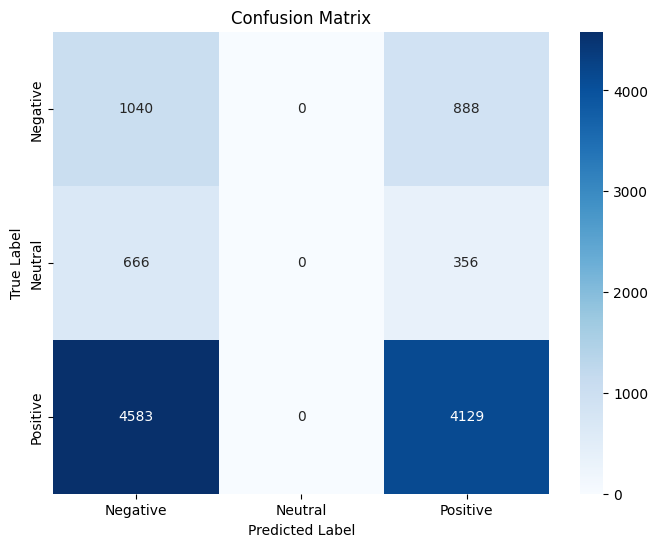

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Training

In [62]:
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

In [63]:
from transformers.keras_callbacks import PushToHubCallback

push_to_hub_callback = PushToHubCallback(
    output_dir="Coursera_Reviews_Sentiment_Analysis_DistillBERT",
    tokenizer=tokenizer,
)

Cloning https://huggingface.co/NourhanAbosaeed/Coursera_Reviews_Sentiment_Analysis_DistillBERT into local empty directory.


In [64]:
callbacks = [metric_callback, push_to_hub_callback]

In [65]:
# using classes weights for balancing
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train),y= y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 2.016535892613968, 1: 3.8048452220726783, 2: 0.4461741538373244}

In [69]:
# return to the zero point

num_epochs=3
batches_per_epoch = len(train_tokenized_data) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

model = TFAutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=3, id2label=id2label, label2id=label2id
)
model.compile(optimizer=optimizer)

# start training
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=num_epochs, callbacks=callbacks, class_weight=class_weight_dict)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
5830/5830 [==============================] - 5535s 935ms/step - loss: 0.6870 - val_loss: 0.6382 - accuracy: 0.7505
Epoch 2/3
5830/5830 [==============================] - 5501s 944ms/step - loss: 0.5836 - val_loss: 0.5976 - accuracy: 0.7583
Epoch 3/3
5830/5830 [==============================] - 5502s 944ms/step - loss: 0.4934 - val_loss: 0.6018 - accuracy: 0.7498


# Evaluation

In [70]:
model.evaluate(tf_test_set)

729/729 [==============================] - 160s 219ms/step - loss: 0.5916


0.591595470905304

In [81]:
predictions = model.predict(tf_test_set)
predictions[0]

729/729 [==============================] - 158s 217ms/step


array([[ 0.8080715 , -3.2854204 ,  2.2608316 ],
       [ 0.81528187, -2.521824  ,  1.55291   ],
       [ 1.0282701 , -3.7090564 ,  2.4073985 ],
       ...,
       [ 1.2671291 , -2.687992  ,  1.3018236 ],
       [ 1.0602793 , -2.679473  ,  1.4193267 ],
       [ 0.5255316 , -1.8007278 ,  1.1585963 ]], dtype=float32)

In [82]:
predicted_labels = tf.argmax(predictions['logits'], axis=1)
true_labels = np.concatenate([label.numpy() for _, label in tf_test_set])

precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Precision: 0.8069690604328561, Recall: 0.7542445549648431, F1 Score: 0.7733043993031345


In [83]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.37      0.59      0.46      1928
           1       0.71      0.74      0.72      1022
           2       0.91      0.79      0.85      8712

    accuracy                           0.75     11662
   macro avg       0.67      0.71      0.68     11662
weighted avg       0.81      0.75      0.77     11662



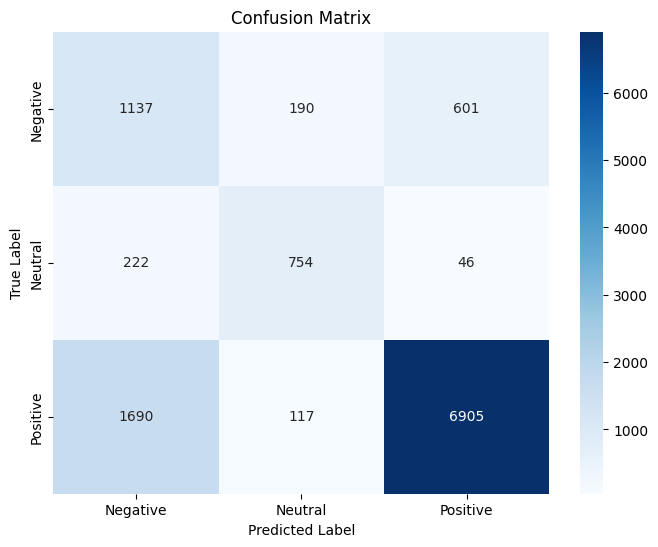

In [84]:
conf_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Inference

In [78]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="NourhanAbosaeed/Coursera_Reviews_Sentiment_Analysis_DistillBERT")
text= "I didn't like the course but also i didn't hate it, it's good!"
classifier(text)

Some layers from the model checkpoint at NourhanAbosaeed/Coursera_Reviews_Sentiment_Analysis_DistillBERT were not used when initializing TFDistilBertForSequenceClassification: ['dropout_99']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at NourhanAbosaeed/Coursera_Reviews_Sentiment_Analysis_DistillBERT and are newly initialized: ['dropout_119']
You should probably TRAIN this model on a down-stream task to be able to use it for predic

[{'label': 'negative', 'score': 0.47868260741233826}]